# Data Science & Society Msc Thesis
## Predicting the training days of the short term training cycle of a youth football team
#### Aron Wattel

# 1. Importing Libraries

In [424]:
# Standard libraries
import pandas as pd
from pandas import DataFrame
from numpy import mean
from numpy import std
import numpy as np 
import sklearn
import random

# Preprocessing and Machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier

# Measure performance
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Figures
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix

from statsmodels.tsa.stattools import acf as acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [171]:
#random.seed(10)

In [142]:
# Check scikit-learn version
print(sklearn.__version__)
print(pd.__version__)
print(np.__version__)

0.23.2
1.1.3
1.19.2


In [143]:
# Check Python version
from platform import python_version
print(python_version())

3.8.5


# 2. Loading and Transforming Data

In [144]:
# Load raw dataset
df = pd.read_excel("thesis_dataset_raw.xlsx")

# Load raw dataset (without "MD" label)
df_no_MD = pd.read_excel("thesis_data_raw_no_MD.xlsx")

# Load aggregated dataset (Labels = "Close", "Long" and "MD")
df_aggregated = pd.read_excel("thesis_data_aggregated.xlsx")

# Load aggregated dataset (without "MD" label)
df_aggregated_no_MD = pd.read_excel("thesis_data_long_close.xlsx")

# Check data types
df.dtypes

name                                     object
datum                            datetime64[ns]
total_distance_m                        float64
high_speed_distance_19_8_km_u           float64
sprint_dist_25_2_km_u                   float64
acceleraties_2m_s2                        int64
deceleraties_2m_s2                        int64
total_player_load                       float64
md                                       object
dtype: object

In [145]:
# Load data and store it into pandas DataFrame objects
X = pd.DataFrame(df[["total_distance_m", "high_speed_distance_19_8_km_u", "sprint_dist_25_2_km_u", "acceleraties_2m_s2", "deceleraties_2m_s2", "total_player_load"]])
y = pd.DataFrame(df["md"])

X_no_MD = pd.DataFrame(df_no_MD[["total_distance_m", "high_speed_distance_19_8_km_u", "sprint_dist_25_2_km_u", "acceleraties_2m_s2", "deceleraties_2m_s2", "total_player_load"]])
y_no_MD = pd.DataFrame(df_no_MD["md"])

X_agg = pd.DataFrame(df_aggregated[["total_distance_m", "high_speed_distance_19_8_km_u", "sprint_dist_25_2_km_u", "acceleraties_2m_s2", "deceleraties_2m_s2", "total_player_load"]])
y_agg = pd.DataFrame(df_aggregated["md"])

X_agg_no_MD = pd.DataFrame(df_aggregated_no_MD[["total_distance_m", "high_speed_distance_19_8_km_u", "sprint_dist_25_2_km_u", "acceleraties_2m_s2", "deceleraties_2m_s2", "total_player_load"]])
y_agg_no_MD = pd.DataFrame(df_aggregated_no_MD["md"])

### Explore data

(1981, 9)
       total_distance_m  high_speed_distance_19_8_km_u  sprint_dist_25_2_km_u  \
count       1981.000000                    1981.000000            1981.000000   
mean        6016.043040                     389.096320              65.263690   
std         2364.163775                     338.415723              97.134252   
min         1125.405670                       0.000000               0.000000   
25%         4140.864320                     120.180000               0.000000   
50%         5692.026120                     293.979990              21.650000   
75%         7443.320610                     580.269990              87.730000   
max        16471.906490                    2497.329960            1112.780030   

       acceleraties_2m_s2  deceleraties_2m_s2  total_player_load  
count         1981.000000         1981.000000        1981.000000  
mean            88.235740           83.157496         650.838391  
std             40.651605           38.531011         245.0

<ipython-input-146-16b4b1f82763>:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = axes)


array([[<AxesSubplot:title={'center':'total_distance_m'}>,
        <AxesSubplot:title={'center':'high_speed_distance_19_8_km_u'}>],
       [<AxesSubplot:title={'center':'sprint_dist_25_2_km_u'}>,
        <AxesSubplot:title={'center':'acceleraties_2m_s2'}>],
       [<AxesSubplot:title={'center':'deceleraties_2m_s2'}>,
        <AxesSubplot:title={'center':'total_player_load'}>]], dtype=object)

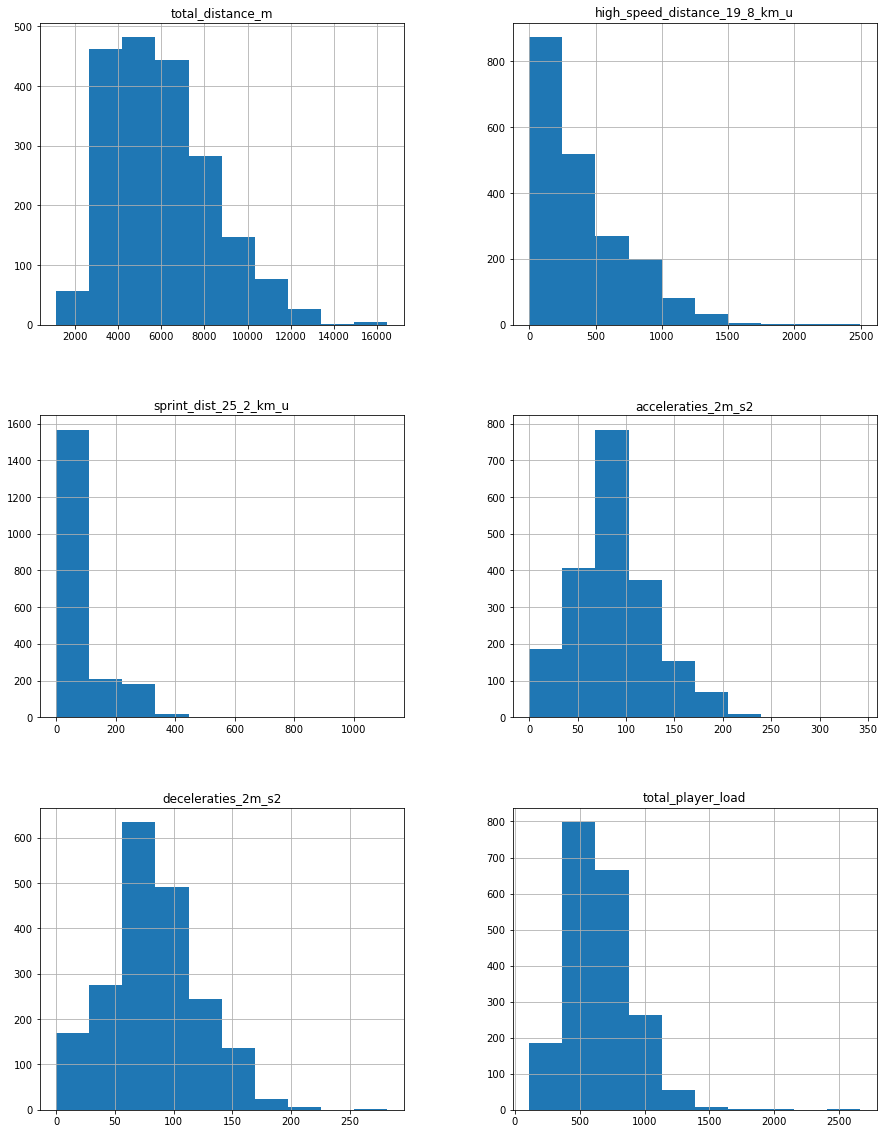

In [146]:
# Check shape 
print(df.shape)

# Summarize each variable
print(df.describe())

# Histograms of the variables
fig_size = plt.figure(figsize = (15,20))
axes = fig_size.gca()
df.hist(ax = axes)

### Normalize Data

In [147]:
# Perform a robust scaler to normalize data
trans_normalize = MinMaxScaler()

raw_data = trans_normalize.fit_transform(X)

raw_data_no_MD = trans_normalize.fit_transform(X_no_MD)

aggregated_data = trans_normalize.fit_transform(X_agg)

aggregated_data_no_MD = trans_normalize.fit_transform(X_agg_no_MD)

# Convert array back to dataframe
raw_data = DataFrame(raw_data)
raw_data_no_MD = DataFrame(raw_data_no_MD)
aggregated_data = DataFrame(aggregated_data)
aggregated_data_no_MD = DataFrame(aggregated_data_no_MD)

# Rename columns
raw_data = raw_data.rename(columns={0: "Total Distance",
                             1: "High Intensity Distance",
                             2: "Sprint Distance",
                             3: "Accelerations",
                             4: "Decelerations",
                             5: "Player Load",})

raw_data_no_MD = raw_data_no_MD.rename(columns={0: "Total Distance",
                             1: "High Intensity Distance",
                             2: "Sprint Distance",
                             3: "Accelerations",
                             4: "Decelerations",
                             5: "Player Load",})

aggregated_data = aggregated_data.rename(columns={0: "Total Distance",
                             1: "High Intensity Distance",
                             2: "Sprint Distance",
                             3: "Accelerations",
                             4: "Decelerations",
                             5: "Player Load",})

aggregated_data_no_MD = aggregated_data_no_MD.rename(columns={0: "Total Distance",
                             1: "High Intensity Distance",
                             2: "Sprint Distance",
                             3: "Accelerations",
                             4: "Decelerations",
                             5: "Player Load",})

(1981, 6)
       Total Distance  High Intensity Distance  Sprint Distance  \
count     1981.000000              1981.000000      1981.000000   
mean         0.318681                 0.155805         0.058649   
std          0.154052                 0.135511         0.087290   
min          0.000000                 0.000000         0.000000   
25%          0.196492                 0.048123         0.000000   
50%          0.297568                 0.117718         0.019456   
75%          0.411684                 0.232356         0.078839   
max          1.000000                 1.000000         1.000000   

       Accelerations  Decelerations  Player Load  
count    1981.000000    1981.000000  1981.000000  
mean        0.257999       0.294885     0.211526  
std         0.118864       0.136635     0.095959  
min         0.000000       0.000000     0.000000  
25%         0.187135       0.209220     0.140130  
50%         0.248538       0.283688     0.200931  
75%         0.321637       0.

<ipython-input-148-9c0078d5e48d>:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  raw_data.hist(ax = axes)


array([[<AxesSubplot:title={'center':'Total Distance'}>,
        <AxesSubplot:title={'center':'High Intensity Distance'}>],
       [<AxesSubplot:title={'center':'Sprint Distance'}>,
        <AxesSubplot:title={'center':'Accelerations'}>],
       [<AxesSubplot:title={'center':'Decelerations'}>,
        <AxesSubplot:title={'center':'Player Load'}>]], dtype=object)

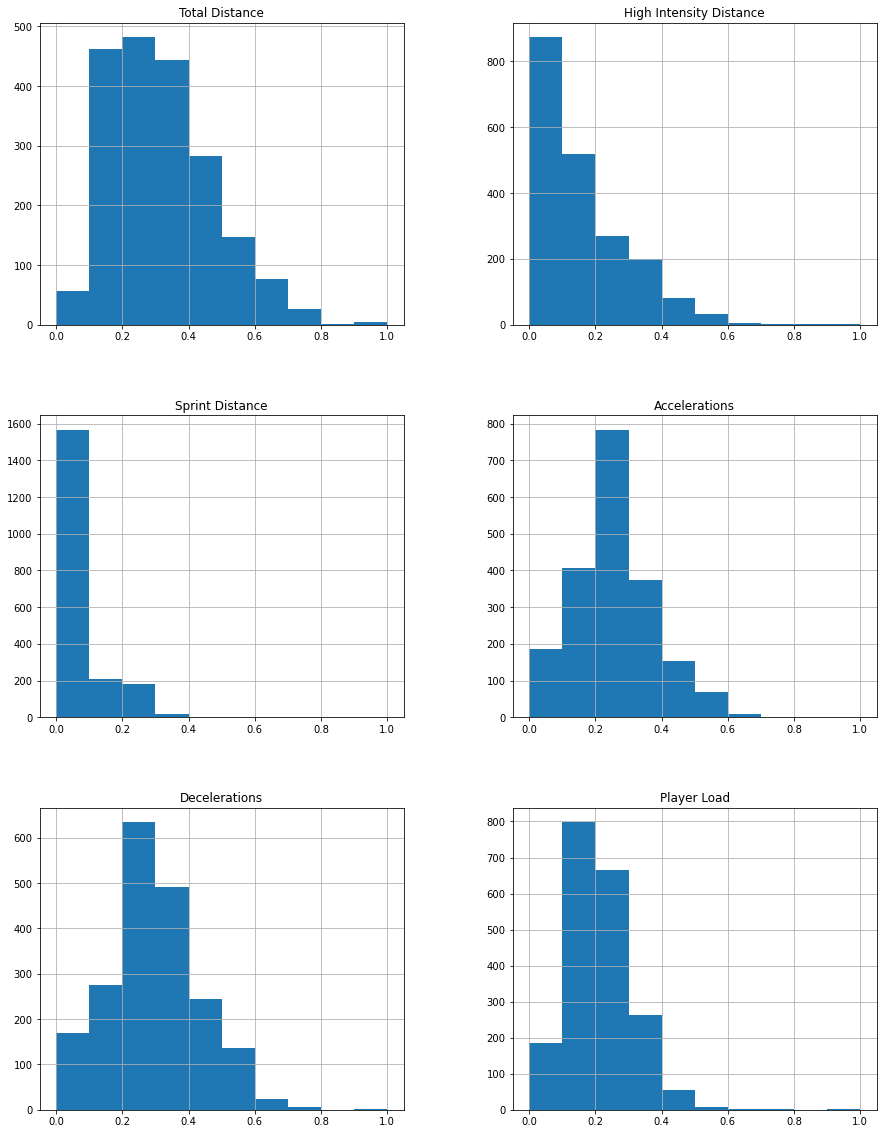

In [148]:
# Check shape 
print(raw_data.shape)

# Summarize each variable
print(raw_data.describe())

# Histograms of the variables
fig_size = plt.figure(figsize = (15,20))
axes = fig_size.gca()
raw_data.hist(ax = axes)

### Standardize Data

In [149]:
# Perform a robust scaler to standardize data
trans_standardize = StandardScaler()

std_raw_data = trans_standardize.fit_transform(X)

std_raw_data_no_MD = trans_standardize.fit_transform(X_no_MD)

std_aggregated_data = trans_standardize.fit_transform(X_agg)

std_aggregated_data_no_MD = trans_standardize.fit_transform(X_agg_no_MD)

# Convert array back to dataframe
std_raw_data = DataFrame(std_raw_data)
std_raw_data_no_MD = DataFrame(std_raw_data_no_MD)
std_aggregated_data = DataFrame(std_aggregated_data)
std_aggregated_data_no_MD = DataFrame(std_aggregated_data_no_MD)

# Rename columns
std_raw_data = std_raw_data.rename(columns={0: "Total Distance",
                             1: "High Intensity Distance",
                             2: "Sprint Distance",
                             3: "Accelerations",
                             4: "Decelerations",
                             5: "Player Load",})

std_raw_data_no_MD = std_raw_data_no_MD.rename(columns={0: "Total Distance",
                             1: "High Intensity Distance",
                             2: "Sprint Distance",
                             3: "Accelerations",
                             4: "Decelerations",
                             5: "Player Load",})

std_aggregated_data = std_aggregated_data.rename(columns={0: "Total Distance",
                             1: "High Intensity Distance",
                             2: "Sprint Distance",
                             3: "Accelerations",
                             4: "Decelerations",
                             5: "Player Load",})

std_aggregated_data_no_MD = std_aggregated_data_no_MD.rename(columns={0: "Total Distance",
                             1: "High Intensity Distance",
                             2: "Sprint Distance",
                             3: "Accelerations",
                             4: "Decelerations",
                             5: "Player Load",})


(1981, 6)
       Total Distance  High Intensity Distance  Sprint Distance  \
count    1.981000e+03             1.981000e+03     1.981000e+03   
mean    -4.737082e-17             1.520462e-16     1.515418e-16   
std      1.000252e+00             1.000252e+00     1.000252e+00   
min     -2.069177e+00            -1.150049e+00    -6.720613e-01   
25%     -7.933681e-01            -7.948337e-01    -6.720613e-01   
50%     -1.370881e-01            -2.811345e-01    -4.491176e-01   
75%      6.038659e-01             5.650504e-01     2.313497e-01   
max      4.423764e+00             6.231288e+00     1.078693e+01   

       Accelerations  Decelerations   Player Load  
count   1.981000e+03   1.981000e+03  1.981000e+03  
mean    3.851594e-17  -1.916690e-17  8.092691e-17  
std     1.000252e+00   1.000252e+00  1.000252e+00  
min    -2.171083e+00  -2.158742e+00 -2.204897e+00  
25%    -5.963321e-01  -6.271207e-01 -7.442136e-01  
50%    -7.961694e-02  -8.196757e-02 -1.104389e-01  
75%     5.355202e-01  

<ipython-input-25-2ad660e5ef6f>:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  std_raw_data.hist(ax = axes)


array([[<AxesSubplot:title={'center':'Total Distance'}>,
        <AxesSubplot:title={'center':'High Intensity Distance'}>],
       [<AxesSubplot:title={'center':'Sprint Distance'}>,
        <AxesSubplot:title={'center':'Accelerations'}>],
       [<AxesSubplot:title={'center':'Decelerations'}>,
        <AxesSubplot:title={'center':'Player Load'}>]], dtype=object)

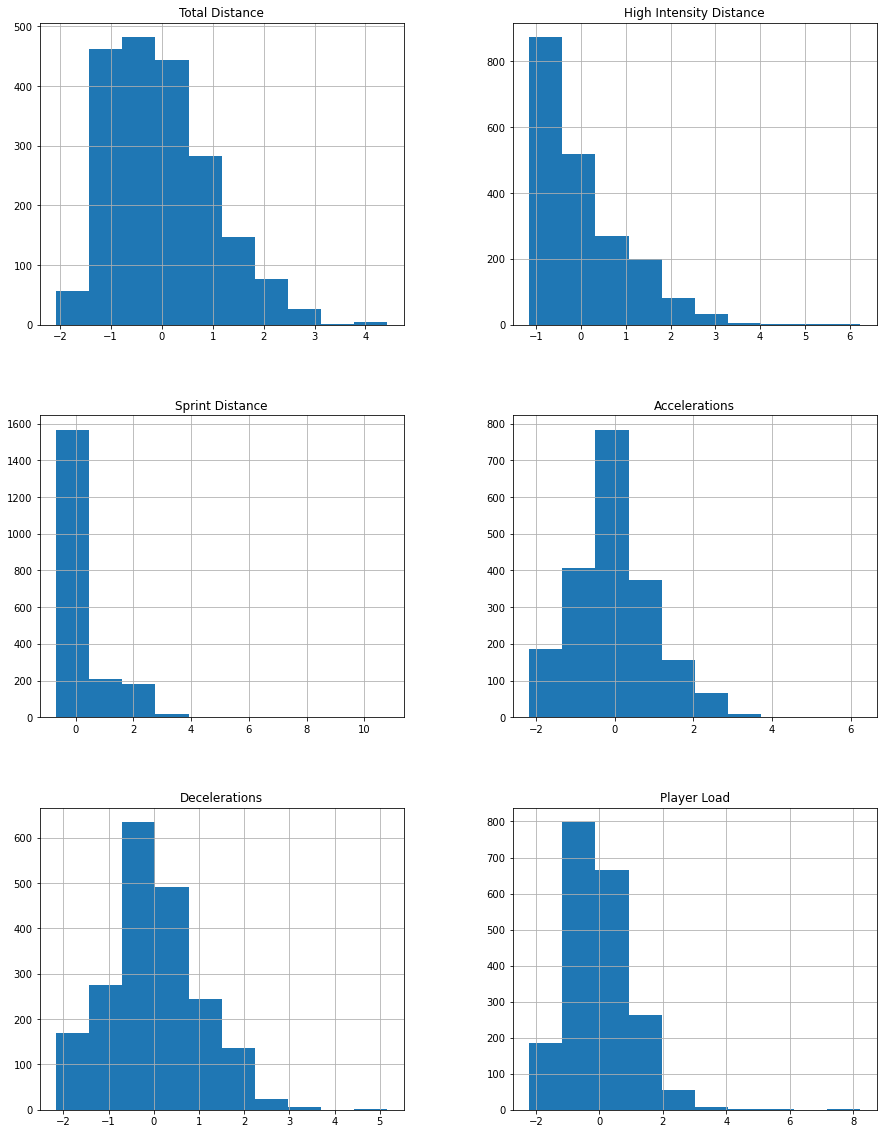

In [25]:
# Check shape 
print(std_raw_data.shape)

# Summarize each variable
print(std_raw_data.describe())

# Histograms of the variables
fig_size = plt.figure(figsize = (15,20))
axes = fig_size.gca()
std_raw_data.hist(ax = axes)

# 3. Split, Train & Compare Results of Models 
### For every model, accuracy results are given for each algorithm:
1. Extra Tree Random Forest Classifier
2. Decistion Tree
3. Dummy Classifier
 
After that, the Precision, Recall, F1-score and Support are given for each label of the Extra Trees Classifier. Finally, the Feature Importance and confusion matrix are given. 

#### Model 1:  Non-aggregated / Including MD 

In [292]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(raw_data, y)

# Create Dummy Classifier
dummy_clf = DummyClassifier(strategy = "most_frequent")

# Defining Decision Tree
stump = DecisionTreeClassifier(max_depth = 1, splitter = "best", max_features = "sqrt")

# Create Extra Trees
ensemble = ExtraTreesClassifier(n_estimators = 100, max_features = 6, min_samples_split = 2)

# Training classifiers
dummy_clf.fit(raw_data, y)
stump.fit(X_train, np.ravel(y_train))
ensemble.fit(X_train, np.ravel(y_train))

# Making predictions
y_pred_dummy = dummy_clf.predict(raw_data)
y_pred_tree = stump.predict(X_test)
y_pred_ensemble = ensemble.predict(X_test)

# Determine performance
dummy_accuracy = dummy_clf.score(raw_data, y)
stump_accuracy = metrics.accuracy_score(y_test, y_pred_tree)
ensemble_accuracy = metrics.accuracy_score(y_test, y_pred_ensemble)

# Print accuracy of all three classifiers
print(f"The accuracy of the Dummy Classifier is {dummy_accuracy*100:.1f} %")
print(f"The accuracy of the Decision Tree is {stump_accuracy*100:.1f} %")
print(f"The accuracy of the Extra Trees is {ensemble_accuracy*100:.1f} %")

The accuracy of the Dummy Classifier is 22.8 %
The accuracy of the Decision Tree is 30.8 %
The accuracy of the Extra Trees is 62.3 %


In [293]:
#scores = cross_val_score(ensemble, raw_data, y, cv=5)
#scores

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=1000)
scores = cross_val_score(ensemble, raw_data, y.values.ravel(), cv=cv)
print(scores)
print(scores.mean())

[0.61512605 0.58991597 0.61512605 0.62521008 0.61176471 0.62521008
 0.60840336 0.63697479 0.60840336 0.57310924]
0.6109243697478991


In [294]:
# Print accuracy of validates Extra Trees
print(f"The accuracy of the validated Extra Trees is {scores.mean()*100:.1f} %")

The accuracy of the validated Extra Trees is 61.1 %


In [295]:
# Print performance report
performance_report = sklearn.metrics.classification_report(y_test, y_pred_ensemble)
print(performance_report)

              precision    recall  f1-score   support

          MD       0.73      0.76      0.75       106
        MD+2       0.50      0.50      0.50       101
        MD-1       0.57      0.64      0.61       121
        MD-2       0.59      0.55      0.57        73
        MD-4       0.74      0.62      0.67        95

    accuracy                           0.62       496
   macro avg       0.63      0.62      0.62       496
weighted avg       0.63      0.62      0.62       496



Text(0.5, 1.0, 'Confusion matrix Model 1')

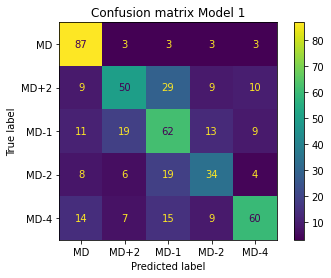

In [291]:
#Create confusion matrix 
conf_matrix_1 = confusion_matrix(y_test, y_pred_ensemble, labels = ensemble.classes_)
display = ConfusionMatrixDisplay(conf_matrix_1, display_labels = ensemble.classes_)
display.plot()
plt.title('Confusion matrix Model 1')


Feature: 0, Score: 0.21553
Feature: 1, Score: 0.20282
Feature: 2, Score: 0.13183
Feature: 3, Score: 0.15344
Feature: 4, Score: 0.15290
Feature: 5, Score: 0.14349


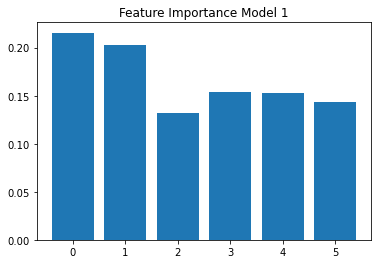

In [393]:
# Print feature importance scores
feature_importances = np.mean([
    tree.feature_importances_ for tree in ensemble.estimators_
], axis=0)

for i,v in enumerate(feature_importances):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(feature_importances))], feature_importances)
plt.title("Feature Importance Model 1")
plt.show()

#### Model 3: Aggregated / Including MD

In [396]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(aggregated_data, y_agg, random_state = 1000)

# Create Dummy Classifier
dummy_clf = DummyClassifier(strategy = "most_frequent")

# Defining Decision Tree
stump = DecisionTreeClassifier(max_depth = 1, splitter = "random", max_features = "sqrt")

# Create Extra Trees
ensemble = ExtraTreesClassifier(n_estimators = 100, max_features = 6, min_samples_split = 2)

# Training classifiers
dummy_clf.fit(aggregated_data, y_agg)
stump.fit(X_train, np.ravel(y_train))
ensemble.fit(X_train, np.ravel(y_train))

# Making predictions
y_pred_dummy = dummy_clf.predict(std_aggregated_data)
y_pred_tree = stump.predict(X_test)
y_pred_ensemble = ensemble.predict(X_test)

# Determine performance
dummy_accuracy = dummy_clf.score(aggregated_data, y_agg)
stump_accuracy = metrics.accuracy_score(y_test, y_pred_tree)
ensemble_accuracy = metrics.accuracy_score(y_test, y_pred_ensemble)

# Print accuracy of all three classifiers
print(f"The accuracy of the Dummy Classifier is {dummy_accuracy*100:.1f} %")
print(f"The accuracy of the Decision Tree is {stump_accuracy*100:.1f} %")
print(f"The accuracy of the Extra Trees is {ensemble_accuracy*100:.1f} %")

The accuracy of the Dummy Classifier is 39.9 %
The accuracy of the Decision Tree is 36.1 %
The accuracy of the Extra Trees is 67.3 %


In [397]:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=1000)
scores = cross_val_score(ensemble, std_aggregated_data, y_agg.values.ravel(), cv=cv)
print(scores)
print(scores.mean())

[0.68403361 0.68235294 0.70420168 0.68571429 0.66722689 0.71764706
 0.69243697 0.69915966 0.6907563  0.67226891]
0.6895798319327732


In [398]:
# Print accuracy of validates Extra Trees
print(f"The accuracy of the validated Extra Trees is {scores.mean()*100:.1f} %")

The accuracy of the validated Extra Trees is 69.0 %


In [399]:
# Print performance report
performance_report = sklearn.metrics.classification_report(y_test, y_pred_ensemble)
print(performance_report)

              precision    recall  f1-score   support

       Close       0.62      0.75      0.68       174
        Long       0.70      0.56      0.62       203
          MD       0.72      0.76      0.74       119

    accuracy                           0.67       496
   macro avg       0.68      0.69      0.68       496
weighted avg       0.68      0.67      0.67       496



Text(0.5, 1.0, 'Confusion matrix Model 3')

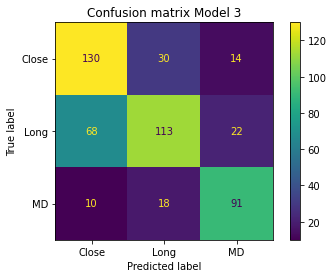

In [400]:
#Create confusion matrix 
conf_matrix_2 = confusion_matrix(y_test, y_pred_ensemble, labels = ensemble.classes_)
display = ConfusionMatrixDisplay(conf_matrix_2, display_labels = ensemble.classes_)
display.plot()
plt.title('Confusion matrix Model 3')

Feature: 0, Score: 0.23520
Feature: 1, Score: 0.20056
Feature: 2, Score: 0.14015
Feature: 3, Score: 0.15469
Feature: 4, Score: 0.13640
Feature: 5, Score: 0.13300


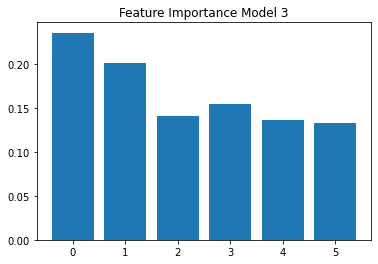

In [403]:
# Print feature importance scores
feature_importances = np.mean([
    tree.feature_importances_ for tree in ensemble.estimators_
], axis=0)

for i,v in enumerate(feature_importances):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(feature_importances))], feature_importances)
plt.title("Feature Importance Model 3")
plt.show()

#### Model 2: Non-aggregated / Excluding MD

In [404]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(raw_data_no_MD, y_no_MD, random_state = 1000)

# Create Dummy Classifier
dummy_clf = DummyClassifier(strategy = "most_frequent")

# Defining Decision Tree
stump = DecisionTreeClassifier(max_depth = 1, splitter = "random", max_features = "sqrt")

# Create Extra Trees
ensemble = ExtraTreesClassifier(n_estimators = 100, max_features = 6, min_samples_split = 2)

# Training classifiers
dummy_clf.fit(raw_data_no_MD, y_no_MD)
stump.fit(X_train, np.ravel(y_train))
ensemble.fit(X_train, np.ravel(y_train))

# Making predictions
y_pred_dummy = dummy_clf.predict(raw_data_no_MD)
y_pred_tree = stump.predict(X_test)
y_pred_ensemble = ensemble.predict(X_test)

# Determine performance
dummy_accuracy = dummy_clf.score(raw_data_no_MD, y_no_MD)
stump_accuracy = metrics.accuracy_score(y_test, y_pred_tree)
ensemble_accuracy = metrics.accuracy_score(y_test, y_pred_ensemble)

# Print accuracy of all three classifiers
print(f"The accuracy of the Dummy Classifier is {dummy_accuracy*100:.1f} %")
print(f"The accuracy of the Decision Tree is {stump_accuracy*100:.1f} %")
print(f"The accuracy of the Extra Trees is {ensemble_accuracy*100:.1f} %")

The accuracy of the Dummy Classifier is 29.2 %
The accuracy of the Decision Tree is 32.6 %
The accuracy of the Extra Trees is 60.5 %


In [405]:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=1000)
scores = cross_val_score(ensemble, raw_data_no_MD, y_no_MD.values.ravel(), cv=cv)
print(scores)
print(scores.mean())

[0.61206897 0.55603448 0.59698276 0.5625     0.61206897 0.61853448
 0.61206897 0.61206897 0.65086207 0.59913793]
0.6032327586206897


In [406]:
# Print accuracy of validates Extra Trees
print(f"The accuracy of the validated Extra Trees is {scores.mean()*100:.1f} %")

The accuracy of the validated Extra Trees is 60.3 %


In [407]:
# Print performance report
performance_report = sklearn.metrics.classification_report(y_test, y_pred_ensemble)
print(performance_report)

              precision    recall  f1-score   support

        MD+2       0.52      0.58      0.55       102
        MD-1       0.55      0.65      0.60       107
        MD-2       0.61      0.49      0.54        88
        MD-4       0.82      0.69      0.75        90

    accuracy                           0.60       387
   macro avg       0.62      0.60      0.61       387
weighted avg       0.62      0.60      0.61       387



Text(0.5, 1.0, 'Confusion matrix Model 2')

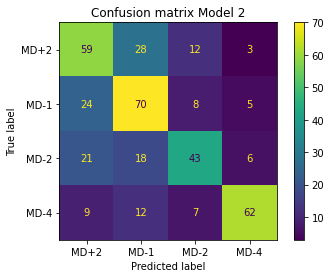

In [408]:
# Create confusion matrix 
conf_matrix_3 = confusion_matrix(y_test, y_pred_ensemble, labels = ensemble.classes_)
display = ConfusionMatrixDisplay(conf_matrix_3, display_labels = ensemble.classes_)
display.plot()
plt.title('Confusion matrix Model 2')

Feature: 0, Score: 0.20541
Feature: 1, Score: 0.19779
Feature: 2, Score: 0.13451
Feature: 3, Score: 0.16241
Feature: 4, Score: 0.15177
Feature: 5, Score: 0.14811


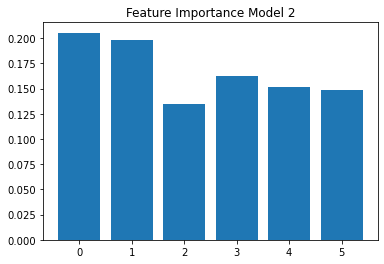

In [409]:
# Print feature importance scores
feature_importances = np.mean([
    tree.feature_importances_ for tree in ensemble.estimators_
], axis=0)

for i,v in enumerate(feature_importances):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(feature_importances))], feature_importances)
plt.title("Feature Importance Model 2")
plt.show()

#### Model 4: Aggregated / Excluding MD

In [450]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(aggregated_data_no_MD, y_agg_no_MD, random_state = 1000)

# Create Dummy Classifier
dummy_clf = DummyClassifier(strategy = "most_frequent")

# Defining Decision Tree
stump = DecisionTreeClassifier(max_depth = 1, splitter = "random", max_features = "sqrt")

# Create Extra Trees
ensemble = ExtraTreesClassifier(n_estimators = 100, max_features = 6, min_samples_split = 2)

# Training classifiers
dummy_clf.fit(aggregated_data_no_MD, y_agg_no_MD)
stump.fit(X_train, np.ravel(y_train))
ensemble.fit(X_train, np.ravel(y_train))

# Making predictions
y_pred_dummy = dummy_clf.predict(aggregated_data_no_MD)
y_pred_tree = stump.predict(X_test)
y_pred_ensemble = ensemble.predict(X_test)

# Determine performance
dummy_accuracy = dummy_clf.score(aggregated_data_no_MD, y_agg_no_MD)
stump_accuracy = metrics.accuracy_score(y_test, y_pred_tree)
ensemble_accuracy = metrics.accuracy_score(y_test, y_pred_ensemble)

# Print accuracy of all three classifiers
print(f"The accuracy of the Dummy Classifier is {dummy_accuracy*100:.1f} %")
print(f"The accuracy of the Decision Tree is {stump_accuracy*100:.1f} %")
print(f"The accuracy of the Extra Trees is {ensemble_accuracy*100:.1f} %")

The accuracy of the Dummy Classifier is 51.2 %
The accuracy of the Decision Tree is 51.7 %
The accuracy of the Extra Trees is 70.0 %


In [411]:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=1000)
scores = cross_val_score(ensemble, std_aggregated_data_no_MD, y_agg_no_MD.values.ravel(), cv=cv)
print(scores)
print(scores.mean())

[0.7112069  0.70474138 0.71767241 0.71982759 0.75862069 0.75
 0.75       0.72844828 0.74353448 0.73491379]
0.7318965517241379


In [412]:
# Print accuracy of validates Extra Trees
print(f"The accuracy of the validated Extra Trees is {scores.mean()*100:.1f} %")

The accuracy of the validated Extra Trees is 73.2 %


In [413]:
# Print performance report
performance_report = sklearn.metrics.classification_report(y_test, y_pred_ensemble)
print(performance_report)

              precision    recall  f1-score   support

       Close       0.70      0.73      0.72       195
        Long       0.71      0.69      0.70       192

    accuracy                           0.71       387
   macro avg       0.71      0.71      0.71       387
weighted avg       0.71      0.71      0.71       387



Text(0.5, 1.0, 'Confusion matrix Model 4')

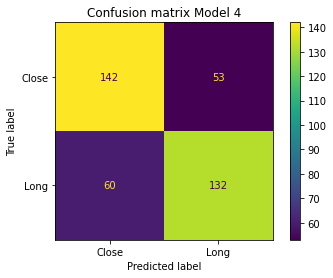

In [414]:
#Create confusion matrix 
conf_matrix_4 = confusion_matrix(y_test, y_pred_ensemble, labels = ensemble.classes_)
display = ConfusionMatrixDisplay(conf_matrix_4, display_labels = ensemble.classes_)
display.plot()
plt.title('Confusion matrix Model 4')

Feature: 0, Score: 0.21436
Feature: 1, Score: 0.19709
Feature: 2, Score: 0.14025
Feature: 3, Score: 0.15229
Feature: 4, Score: 0.15185
Feature: 5, Score: 0.14416


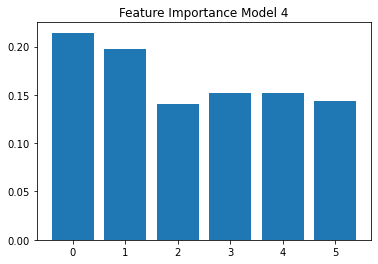

In [451]:
# Print feature importance scores
feature_importances = np.mean([
    tree.feature_importances_ for tree in ensemble.estimators_
], axis=0)

for i,v in enumerate(feature_importances):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(feature_importances))], feature_importances)
plt.title("Feature Importance Model 4")
plt.show()

# 4. Autocorrelation

AxesSubplot(0.125,0.125;0.775x0.755)


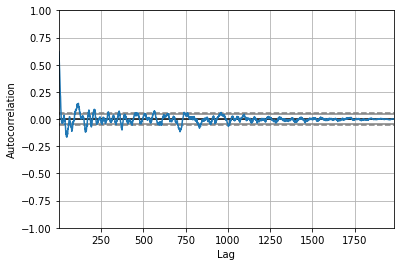

In [220]:
# Check autocorrelation for particular feature 
print(autocorrelation_plot(df['acceleraties_2m_s2']))

## Autocorrelation plot

(0.0, 100.0)

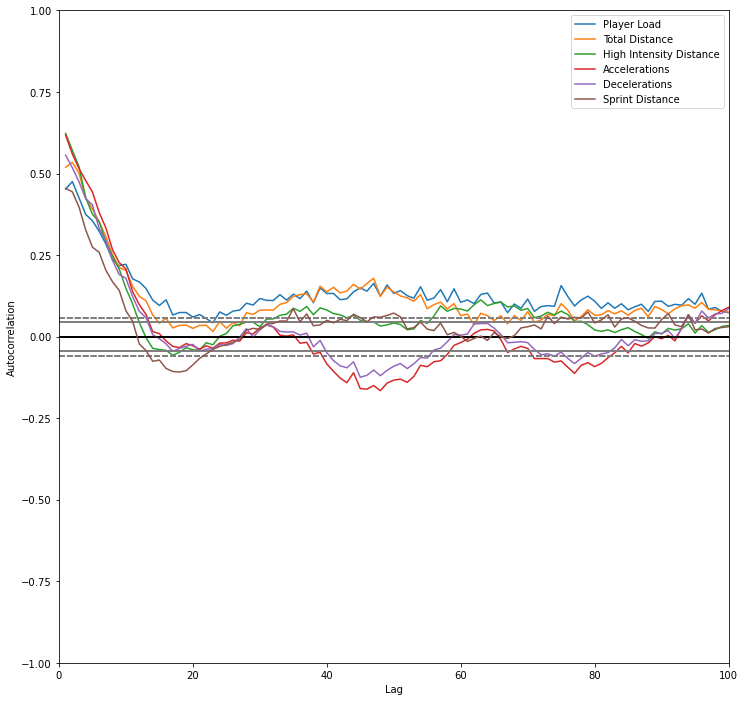

In [485]:
plt.figure(figsize=(12,12))
pl = pd.Series(df['total_player_load'].values, index=df['datum'])
td = pd.Series(df['total_distance_m'].values, index=df['datum'])
hsp = pd.Series(df['high_speed_distance_19_8_km_u'].values, index=df['datum'])
acc = pd.Series(df['acceleraties_2m_s2'].values, index=df['datum'])
dec = pd.Series(df['deceleraties_2m_s2'].values, index=df['datum'])
spr = pd.Series(df['sprint_dist_25_2_km_u'].values, index=df['datum'])

player_load_ac = autocorrelation_plot(pl, label = "Player Load")
total_distance_ac = autocorrelation_plot(td, label = 'Total Distance')
high_intensity_distance_ac = autocorrelation_plot(hsp, label = 'High Intensity Distance')
acceleraties_ac = autocorrelation_plot(acc, label = 'Accelerations')
deceleraties_ac = autocorrelation_plot(dec, label = 'Decelerations')
sprint_distance_ac = autocorrelation_plot(spr, label = 'Sprint Distance')

plt.xlim(0, 100)

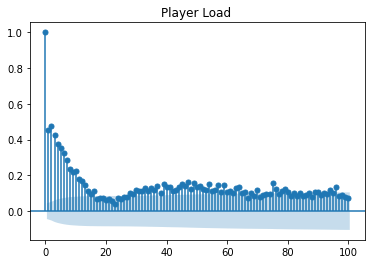

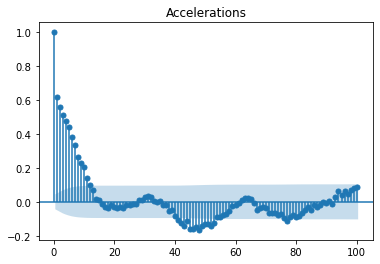

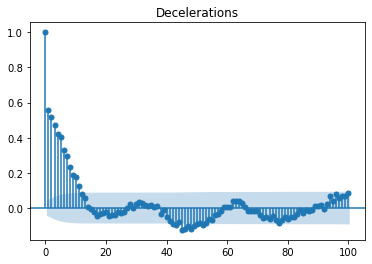

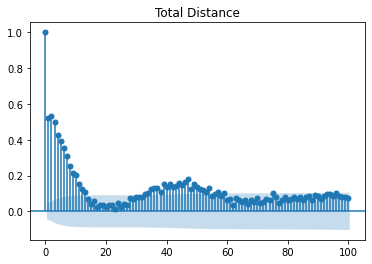

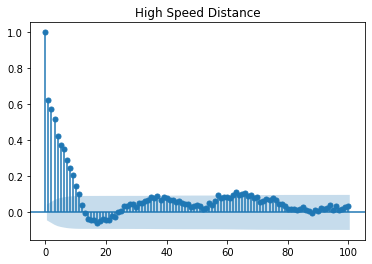

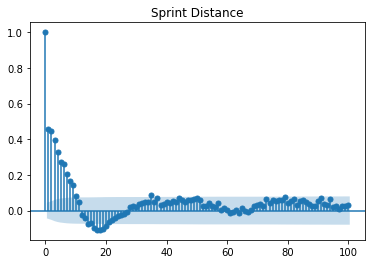

In [476]:
plot_acf(pl, lags=100, title='Player Load ')
plot_acf(acc, lags=100, title= 'Accelerations')
plot_acf(dec, lags=100, title= 'Decelerations')
plot_acf(td, lags=100, title= 'Total Distance')
plot_acf(hsp, lags=100, title= 'High Speed Distance')
plot_acf(spr, lags=100, title= 'Sprint Distance')
plt.show()

## Autocorrelation plot aggregated data

(0.0, 100.0)

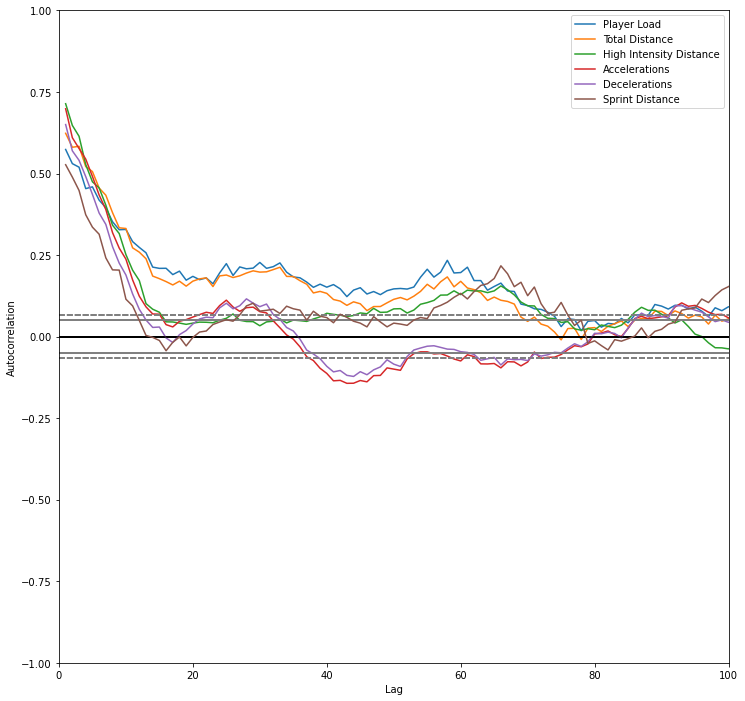

In [487]:
plt.figure(figsize=(12,12))
pl = pd.Series(df_aggregated_no_MD['total_player_load'].values, index = df_aggregated_no_MD['datum'])
td = pd.Series(df_aggregated_no_MD['total_distance_m'].values, index = df_aggregated_no_MD['datum'])
hsp = pd.Series(df_aggregated_no_MD['high_speed_distance_19_8_km_u'].values, index = df_aggregated_no_MD['datum'])
acc = pd.Series(df_aggregated_no_MD['acceleraties_2m_s2'].values, index = df_aggregated_no_MD['datum'])
dec = pd.Series(df_aggregated_no_MD['deceleraties_2m_s2'].values, index = df_aggregated_no_MD['datum'])
spr = pd.Series(df_aggregated_no_MD['sprint_dist_25_2_km_u'].values, index = df_aggregated_no_MD['datum'])

player_load_ac = autocorrelation_plot(pl, label = "Player Load")
total_distance_ac = autocorrelation_plot(td, label = 'Total Distance')
high_intensity_distance_ac = autocorrelation_plot(hsp, label = 'High Intensity Distance')
acceleraties_ac = autocorrelation_plot(acc, label = 'Accelerations')
deceleraties_ac = autocorrelation_plot(dec, label = 'Decelerations')
sprint_distance_ac = autocorrelation_plot(spr, label = 'Sprint Distance')

plt.xlim(0, 100)

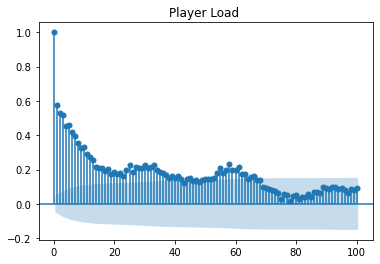

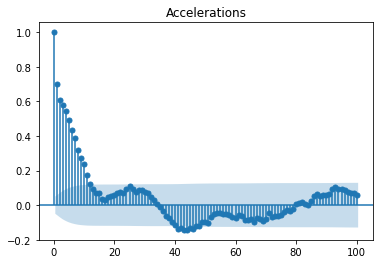

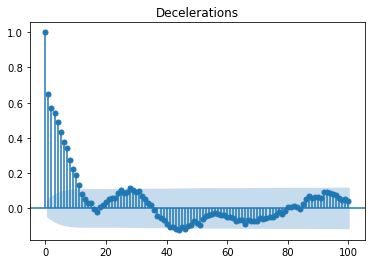

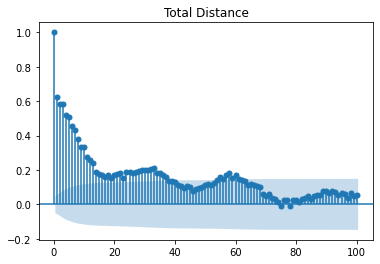

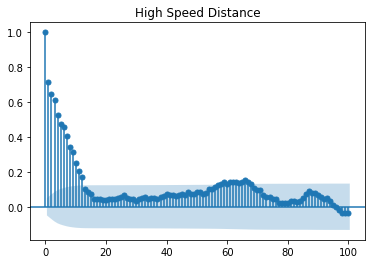

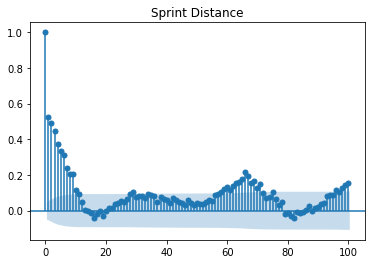

In [488]:
plot_acf(pl, lags=100, title='Player Load ')
plot_acf(acc, lags=100, title= 'Accelerations')
plot_acf(dec, lags=100, title= 'Decelerations')
plot_acf(td, lags=100, title= 'Total Distance')
plot_acf(hsp, lags=100, title= 'High Speed Distance')
plot_acf(spr, lags=100, title= 'Sprint Distance')
plt.show()

# 5. Hyperparameter tuning

>10 0.627 (0.027)
>50 0.627 (0.029)
>100 0.629 (0.029)
>500 0.627 (0.030)
>1000 0.625 (0.027)
>5000 0.628 (0.030)
>10000 0.627 (0.028)


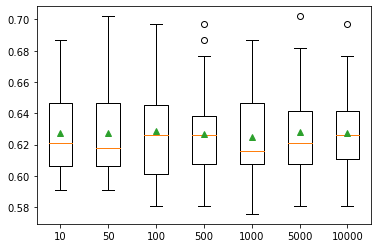

In [101]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000, 5000, 10000]
    for n in n_trees:
        models[str(n)] = ExtraTreesClassifier(n_estimators=n)
    return models
    
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(ensemble, std_aggregated_data, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>10 0.629 (0.027)
>50 0.629 (0.026)
>100 0.628 (0.027)
>500 0.629 (0.027)
>1000 0.626 (0.026)
>5000 0.631 (0.028)


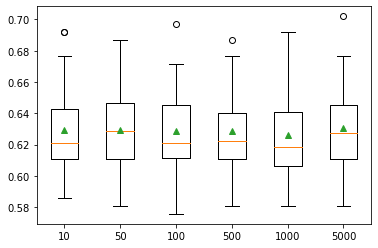

>1 0.738 (0.026)
>2 0.735 (0.028)
>3 0.737 (0.025)
>4 0.739 (0.031)
>5 0.737 (0.029)
>6 0.735 (0.030)


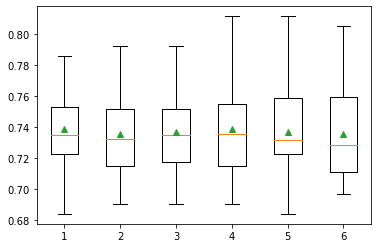

In [65]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore number of features from 1 to 6
    for i in range(1, 7):
        models[str(i)] = ExtraTreesClassifier(max_features=i)
    return models
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(ensemble, std_aggregated_data_no_MD, y_agg_no_MD)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>2 0.740 (0.029)
>3 0.737 (0.028)
>4 0.739 (0.030)
>5 0.737 (0.029)
>6 0.738 (0.026)
>7 0.735 (0.028)
>8 0.735 (0.027)
>9 0.737 (0.027)
>10 0.738 (0.028)
>11 0.737 (0.028)
>12 0.736 (0.027)
>13 0.737 (0.029)
>14 0.739 (0.028)
>15 0.736 (0.027)


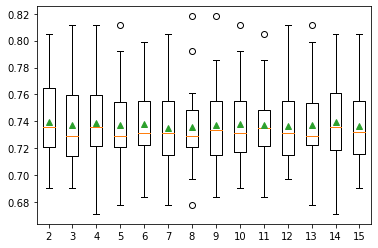

In [102]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore the number of samples per split from 2 to 16
    for i in range(2, 16):
        models[str(i)] = ExtraTreesClassifier(min_samples_split=i)
    return models

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(ensemble, std_aggregated_data_no_MD, y_agg_no_MD)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()